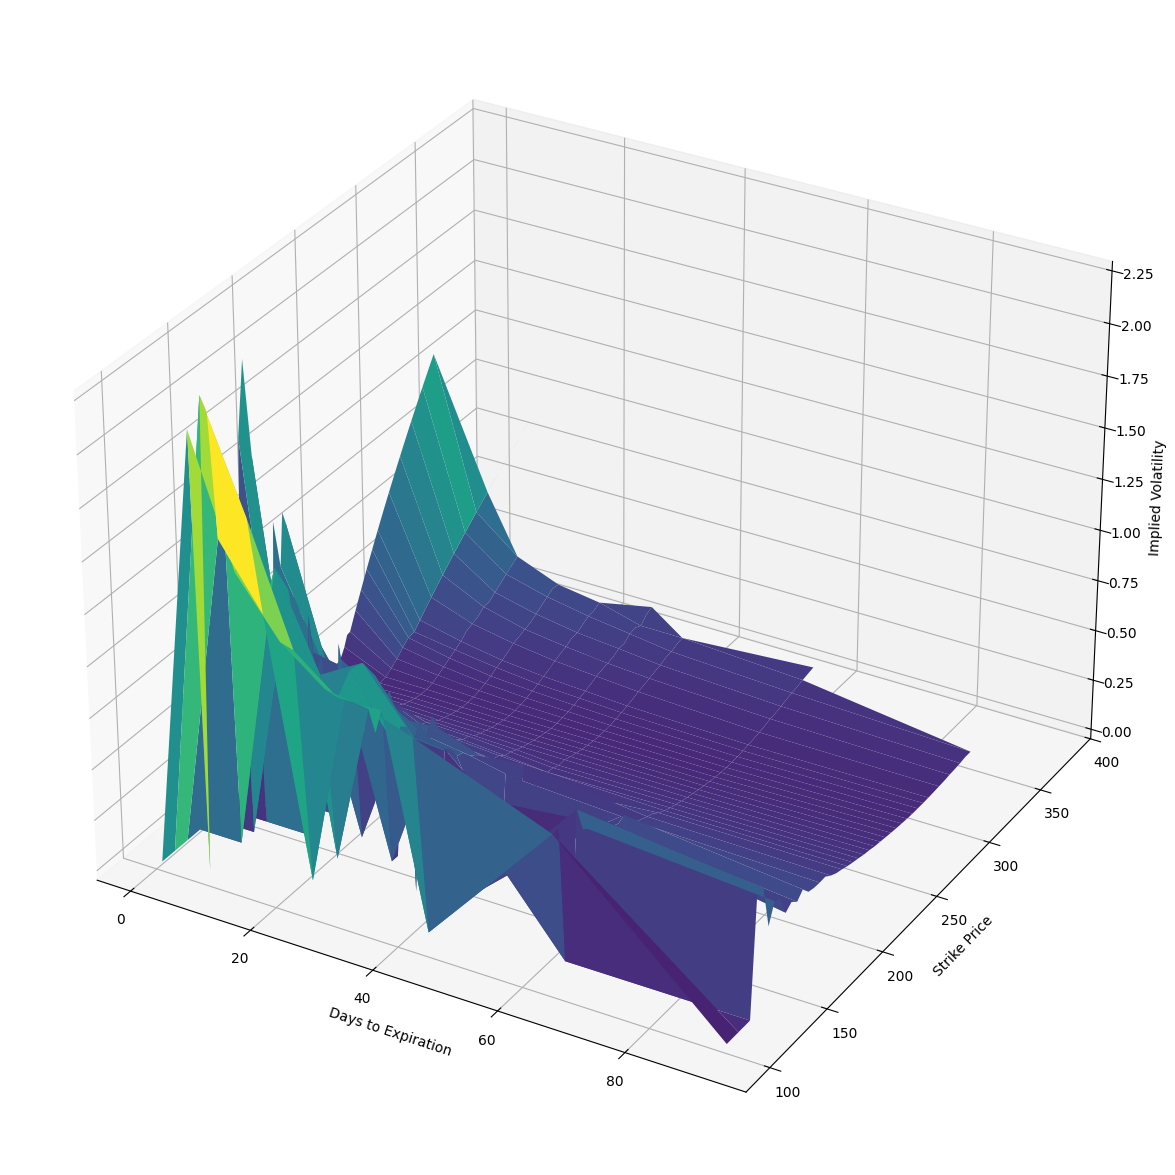

In [29]:
import matplotlib.pyplot as plt 
import numpy as np
from openbb import obb

obb.user.preferences.output_type = 'dataframe'

chains = obb.derivatives.options.chains(
    'AAPL',
    provider='cboe'
)
calls = chains[(chains['dte'] < 100) & (chains['strike'] >= 100) & (chains['option_type'] == 'call')].copy()
calls.drop_duplicates(subset=['dte', 'strike'], keep='first', inplace=True)
vol_surface = (
    calls
    .pivot(
        index='strike',
        columns='dte',
        values='implied_volatility'
    ).dropna(how='all', axis=1)
)

dte, strike = np.meshgrid(
    vol_surface.columns,
    vol_surface.index,
)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Days to Expiration')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Implied Volatility')

ax.plot_surface(
    dte,
    strike,
    vol_surface.values,
    cmap='viridis'
)